In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import keras.optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras import callbacks

In [ ]:
# no of rows that are removed from the dataset because 6th row wasn't their for that particular plane
rows_removed = 0  

#convert an array of calues into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    global rows_removed
    for i in range(len(dataset) - look_back-1):
        if (dataset[i + look_back][0] != dataset[i][0]):
            rows_removed = rows_removed + 1
            continue
        a = dataset[i:(i + look_back), 1:]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 1:])
    return np.array(dataX), np.array(dataY)

In [ ]:
#fix random seed for reproducibility
np.random.seed(7)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving new planes - new planes.csv to new planes - new planes.csv


In [ ]:
#load the dataset
dataframe = read_csv("new planes - new planes.csv", engine='python')
dataset = dataframe.values
dataset = dataset.astype('int32')
print(dataset)

#scaler = MinMaxScaler()
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

[[     0 -13594  -9455     27     82      0]
 [     0 -13925  -9255     71     82      4]
 [     0 -14265  -9055    117     84      8]
 ...
 [  2128 -12208  -8147     43     72    943]
 [  2128 -12374  -8447     27     72    948]
 [  2128 -12541  -8743     14     72    952]]


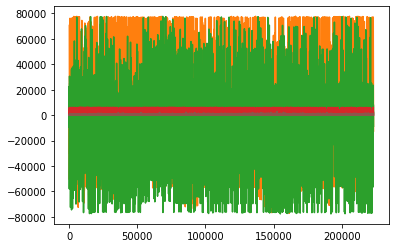

In [ ]:
plt.plot(dataset)
plt.show()

In [ ]:
#split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

#reshape into X=t and Y=t+1
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#print(rows_removed)
# print sample data
for i in range(0, 5):
  print(trainX[i], trainY[i])

#reshape input to be[ samples, time steps, features]
print(trainX.shape)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 5))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 5))



[[-0.64529768 -0.12594683 -1.46126583 -1.08163841 -1.23991817]
 [-0.65688778 -0.11862478 -1.43112518 -1.08163841 -1.22869945]
 [-0.66879301 -0.11130272 -1.3996145  -1.03010965 -1.21748073]
 [-0.6810484  -0.10390744 -1.36810381 -0.97858088 -1.20345732]
 [-0.69361892 -0.09651217 -1.33796316 -0.92705211 -1.1922386 ]] [-0.70643456 -0.08897045 -1.30645247 -0.87552335 -1.17821519]
[[-0.65688778 -0.11862478 -1.43112518 -1.08163841 -1.22869945]
 [-0.66879301 -0.11130272 -1.3996145  -1.03010965 -1.21748073]
 [-0.6810484  -0.10390744 -1.36810381 -0.97858088 -1.20345732]
 [-0.69361892 -0.09651217 -1.33796316 -0.92705211 -1.1922386 ]
 [-0.70643456 -0.08897045 -1.30645247 -0.87552335 -1.17821519]] [-0.71960035 -0.08113585 -1.2708317  -0.84975896 -1.16699647]
[[-0.66879301 -0.11130272 -1.3996145  -1.03010965 -1.21748073]
 [-0.6810484  -0.10390744 -1.36810381 -0.97858088 -1.20345732]
 [-0.69361892 -0.09651217 -1.33796316 -0.92705211 -1.1922386 ]
 [-0.70643456 -0.08897045 -1.30645247 -0.87552335 -1.17

In [ ]:
#create and fit the LSTM Network
n_steps = 5
n_features = 5    # no of features are now = 5 in multiple parallel series
batch_size = 1
# define model
model = Sequential()
#$model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(10, activation='relu'))
#model.add(LSTM(100, activation='relu'))
model.add(Dense(n_features))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')
model.fit(trainX, trainY, epochs=30, verbose=2, validation_data = (testX, testY), callbacks = callbacks.EarlyStopping(monitor='val_loss', patience = 3, restore_best_weights=True))

Epoch 1/30
4511/4511 - 41s - loss: 0.0206 - val_loss: 0.0020
Epoch 2/30
4511/4511 - 36s - loss: 0.0013 - val_loss: 9.2327e-04
Epoch 3/30
4511/4511 - 36s - loss: 7.7912e-04 - val_loss: 7.9347e-04
Epoch 4/30
4511/4511 - 36s - loss: 5.3389e-04 - val_loss: 3.9354e-04
Epoch 5/30
4511/4511 - 36s - loss: 4.2020e-04 - val_loss: 4.0644e-04
Epoch 6/30
4511/4511 - 36s - loss: 3.4452e-04 - val_loss: 2.3226e-04
Epoch 7/30
4511/4511 - 36s - loss: 2.9519e-04 - val_loss: 2.0560e-04
Epoch 8/30
4511/4511 - 36s - loss: 2.6705e-04 - val_loss: 4.3626e-04
Epoch 9/30
4511/4511 - 36s - loss: 2.3880e-04 - val_loss: 2.3839e-04
Epoch 10/30
4511/4511 - 36s - loss: 2.1859e-04 - val_loss: 1.5574e-04
Epoch 11/30
4511/4511 - 35s - loss: 2.0167e-04 - val_loss: 1.6851e-04
Epoch 12/30
4511/4511 - 36s - loss: 1.8420e-04 - val_loss: 2.9000e-04
Epoch 13/30
4511/4511 - 36s - loss: 1.9120e-04 - val_loss: 1.4614e-04
Epoch 14/30
4511/4511 - 36s - loss: 1.6573e-04 - val_loss: 1.4525e-04
Epoch 15/30
4511/4511 - 36s - loss: 1.624

In [ ]:
#make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
#model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1]))
trainPredict = np.reshape(trainPredict, (trainX.shape[0], trainX.shape[1]))
testPredict = np.reshape(testPredict, (testX.shape[0], testX.shape[1]))

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

ValueError: ignored

(144347, 5) (144347, 5)
[[ 0  0 -1  0 -1]
 [ 0  0 -1  0 -1]
 [ 0  0 -1  0 -1]
 ...
 [-1 -2  1  0  0]
 [-1 -2  1  0  0]
 [-1 -2  1  0  0]]
[[-0.70643456 -0.08897045 -1.30645247 -0.87552335 -1.17821519]
 [-0.71960035 -0.08113585 -1.2708317  -0.84975896 -1.16699647]
 [-0.73311629 -0.07319141 -1.23589594 -0.7982302  -1.15297307]
 ...
 [-1.20953574 -2.28306144  1.02259808 -0.07682746 -0.74629434]
 [-1.21597857 -2.30286761  1.02122805 -0.07682746 -0.73227093]
 [-1.22011038 -2.32336937  1.01985802 -0.07682746 -0.72105221]]
Train Score: 0.51 RMSE
Test Score: 0.01 RMSE


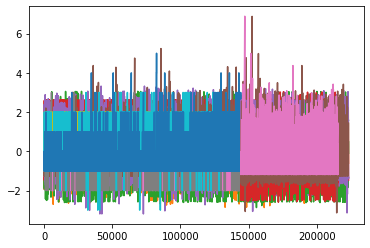

In [ ]:
print(trainY.shape, trainPredict.shape)
trainPredict = trainPredict.astype('int32')
print(trainPredict)
print(trainY)
#calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:], trainPredict[:]))
print("Train Score: %.2f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:], testPredict[:]))
print("Test Score: %.2f RMSE" % (testScore))


#shift train predictions for plotting 
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :5] = trainPredict

#shift test predictions for plottting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1: len(dataset)-1 - rows_removed, :5] = testPredict

#plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
# demonstrate prediction
x_input = np.array([[10315, 19860, 5244, 217, 430], [11297, 20080, 5308, 217, 434], [12281, 20298, 5374, 217, 439], [13267, 20514, 5443, 217, 444], [14253, 20725, 5508, 217, 448]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[ 3984.5278 11707.403   7747.872   7160.999   3603.4373]]
